In [14]:
import pandas as pd 
from tabulate import tabulate

table = [['Name', 'Datatype', 'Units', 'Description'],
         ['Index counter', 'Discrete Numeric', 'NA', 'Index of each diamond' ],
         ['Carat', 'Continous Numeric', 'Carats', 'Carat weight of diamond (1 carat = 0.20g)'],
         ['Cut', 'Ordinal Categorical', 'NA', 'Quality of cut; Increasing order Fair, Good, Very Good,\
         Premium, Ideal'],
         ['Color', 'Ordinal Categorical', 'NA', 'Colour grade of diamond; from best D, E, F, G, H, I, J to worst'],
         ['Clarity', 'Ordinal Categorical', 'NA', 'How obvious inclusions(small inperfections) are within the diamons \
          List from best to worst: \
          \nIF: flawless \nVVS1 or VVS2: Very Very Slightly Included \nVS1 or VS2: Very Slightly Included \
          \nS1 or S2: Slightly Included \nI1 or I2:Included'],
         ['Table', 'Continuous Numeric', 'percetange', 'width of the diamond\'s table(facet seen when diamond is viwed face up) relative to it\'s widest point'],
         ['price', 'Continous Numeric', 'US dollars', 'cost of the diamond'],
         ['x', 'Continous Numeric', 'Millimetres', 'length of the diamond'],
         ['y', 'Continous Numeric', 'Millimetres', 'width of the diamond'],
         ['z', 'Continous Numeric', 'Millimetres', 'depth of the diamond'],
         ['Depth', 'Continous Numeric', 'percentage', 'Depth percentage measured from the cutlet(flat face at the bottom of the gemstone) to the table,\
        divided by its girdle(line that separates the crown from the pavillion of the edge of a diamond) diameter']
        ]

# print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


| Name | Datatype | Units | Description | 
| :-- | :-- | :-- | :-- |
| Index counter | Discrete Numeric | NA | Index of each diamond |
| Carat | Continuous Numeric | Carats | Carat weight of diamond (1 carat = 0.20g) |
| Cut | Ordinal Categorical | NA | Quality of cut; Increasing order: Fair, Good, Very Good,Premium, Ideal |
| Color | Ordinal Categorical | NA | Colour grade of diamond; (best)D, E, F, G, H, I, J(worst) |
| Clarity | Ordinal Categorical | NA | How obvious inclusions(small imperfections) are within the diamonds. List from best to worst: <br> <b>IF:</b> flawless <br><b>VVS1 or VVS2:</b> Very Very Slightly Included <br> <b>VS1 or VS2:</b> Very Slightly Included <br> <b>S1 or S2</b>: Slightly Included <br> <b>nI1 or I2</b>:Included|
| Table | Continuous Numeric | Percentage | width of the diamond's table(facet seen when diamond is viwed face up) relative to it's widest point |
| price | Continuous Numeric | US dollars | cost of the diamond |
| x | Continuous Numeric | Millimeter | length of the diamond |
| y | Continuous Numeric | Millimeter | width of the diamond |
| y | Continuous Numeric | Millimeter | depth of the diamond |
| Depth | Continuous Numeric | percentage | Depth percentage measured from the cutlet(flat face at the bottom of the gemstone) to the table, divided by its girdle(line that separates the crown from the pavilion of the edge of a diamond) diameter |

Target feature 

The aim of this report is to investigate how a range of different variable can impact the price/value of a diamond. Therefore, the Target feature for this project will be price of diamonds in US dollars. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

df = pd.read_csv('diamonds.csv')

In [140]:
#encoding clarity
clarity = {'I2': 0, 'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'].replace(clarity, inplace=True)

cut = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
df['cut'].replace(cut, inplace=True)

df = df.sample(n=1000, random_state=5)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
16408,1.50,0,G,2,68.5,66.0,6.87,6.76,4.67,6552
52904,0.72,4,F,3,62.7,57.0,5.69,5.73,3.58,2586
50404,0.58,4,G,7,61.3,56.0,5.36,5.40,3.30,2256
49508,0.50,2,F,7,62.2,57.0,5.03,5.07,3.14,2121
6384,0.25,2,E,7,62.9,59.0,3.99,4.02,2.52,576


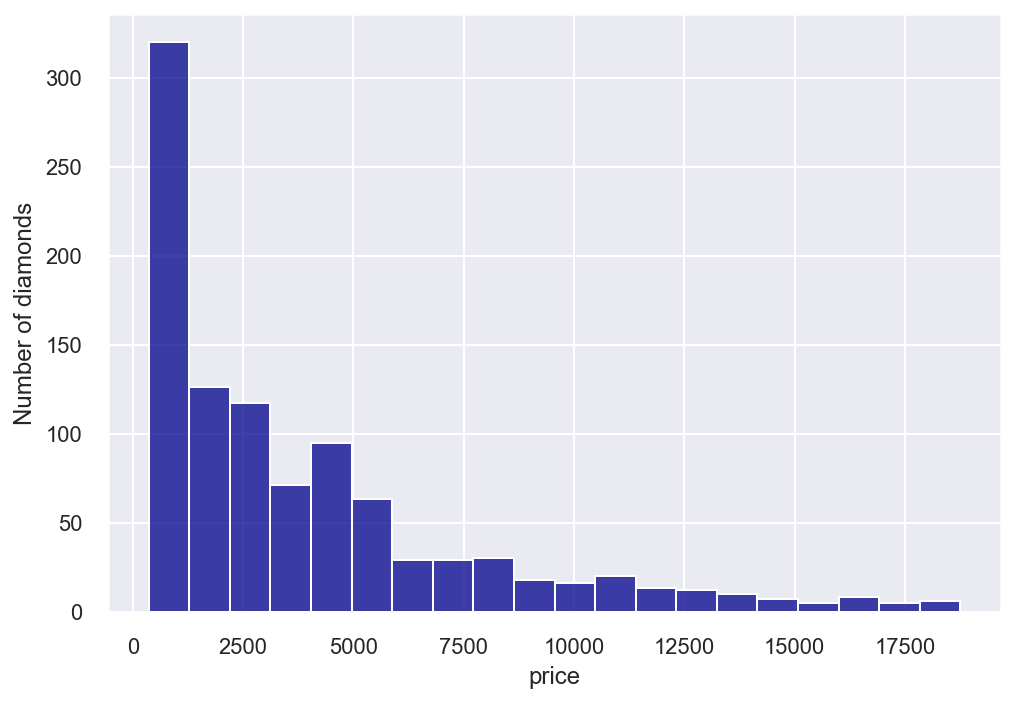

In [181]:
sns.histplot(df['price'], bins=20, color='darkblue')
plt.xlabel('price')
plt.ylabel('Number of diamonds')
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

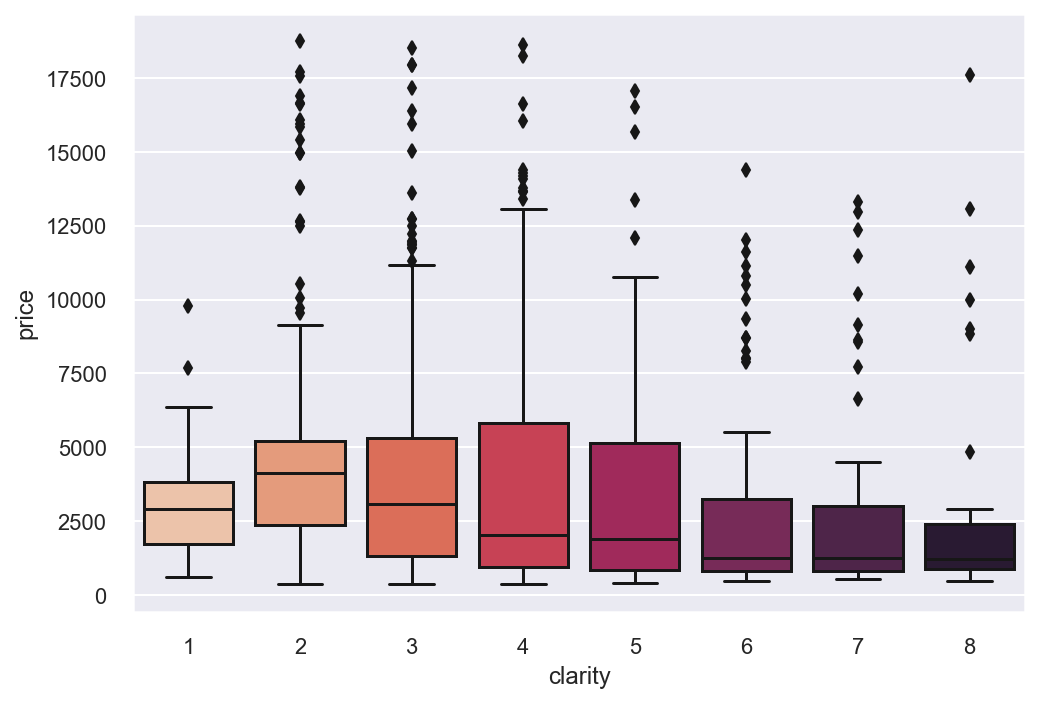

In [175]:
#box plot of price by level of clarity

sns.boxplot(x="clarity", y="price", data=df, palette="rocket_r")

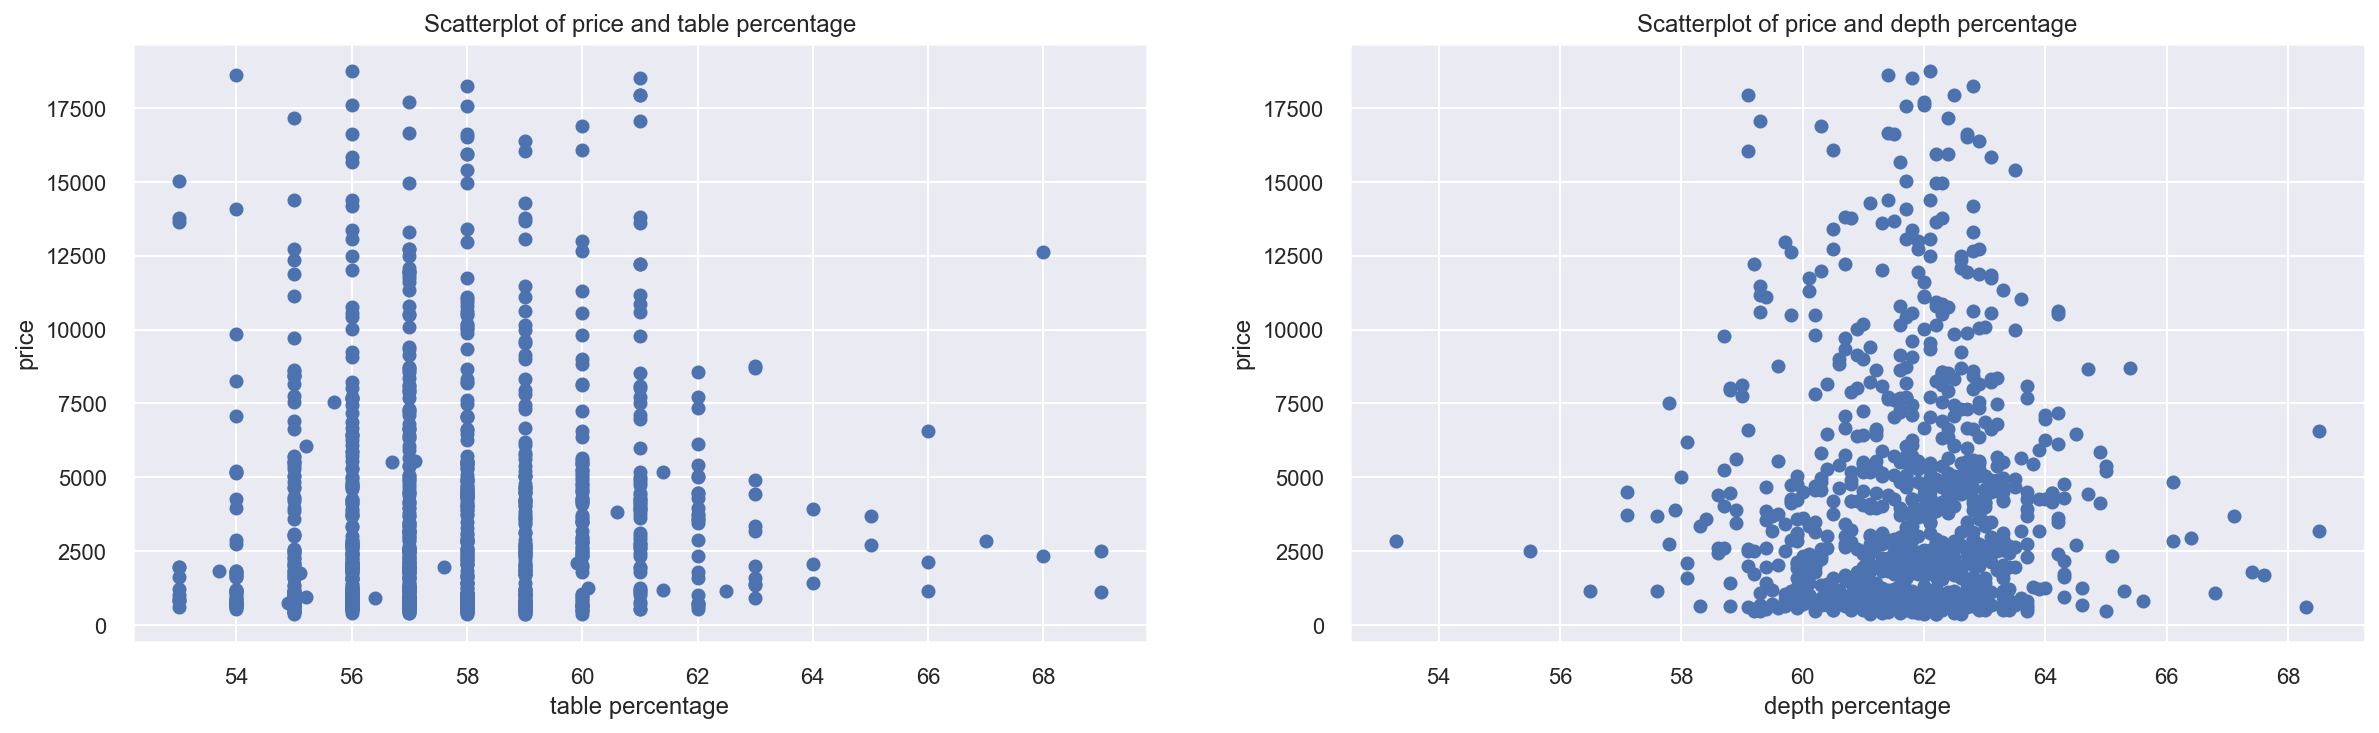

In [221]:
#plot mean price for different lengths

fig = plt.figure()
fig.set_figwidth(20)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)



ax1.scatter(df['table'], df['price'])
ax1.set_title('Scatterplot of price and table percentage')
ax1.set_xlabel('table percentage')
ax1.set_ylabel('price')


ax2.scatter(df['depth'], df['price'])
ax2.set_title('Scatterplot of price and depth percentage')
ax2.set_xlabel('depth percentage')
ax2.set_ylabel('price')
plt.show()

Text(0.5, 0, 'Measurement')

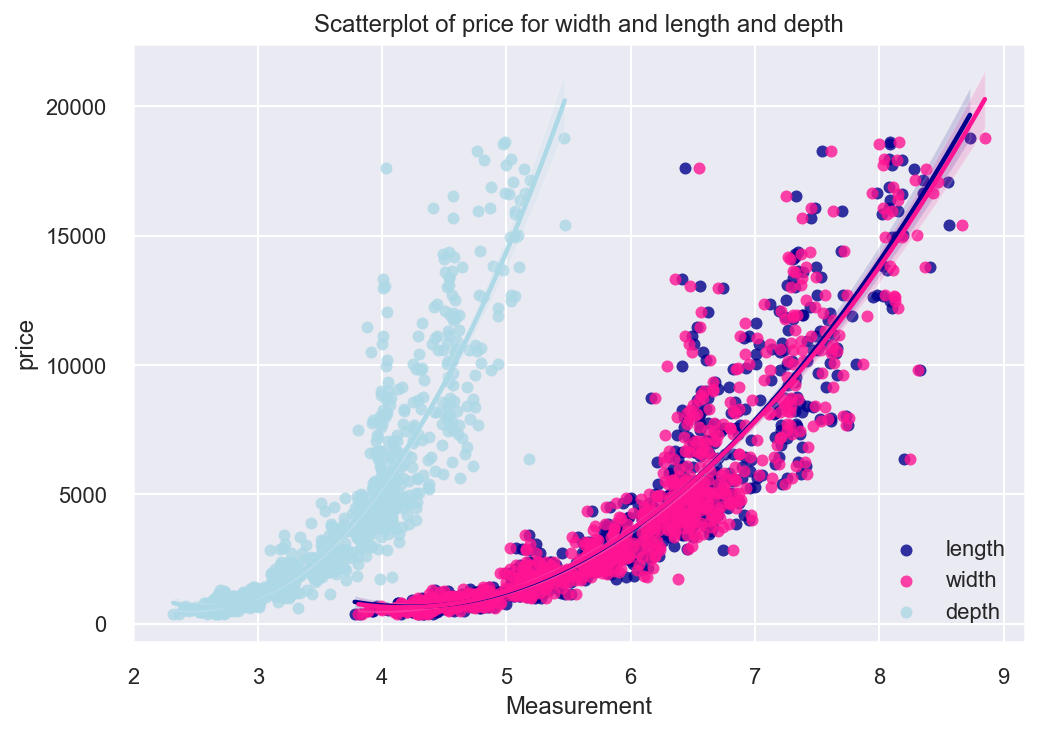

In [225]:
#Prices for different width, lengths, and depths 
sns.set_style("darkgrid")

plt.title('Scatterplot of price for width and length and depth')
sns.regplot(data=df, x="y", y="price", order=2, color="darkblue", label='length')
sns.regplot(data=df, x="x", y="price", order=2, color="deeppink", label='width')
sns.regplot(data=df, x="z", y="price", order=2, color="lightblue", label='depth')
plt.legend(loc='lower right')
plt.xlabel("Measurement")

<AxesSubplot:title={'center':'Scatterplot of price for width and length and depth'}, xlabel='carat', ylabel='price'>

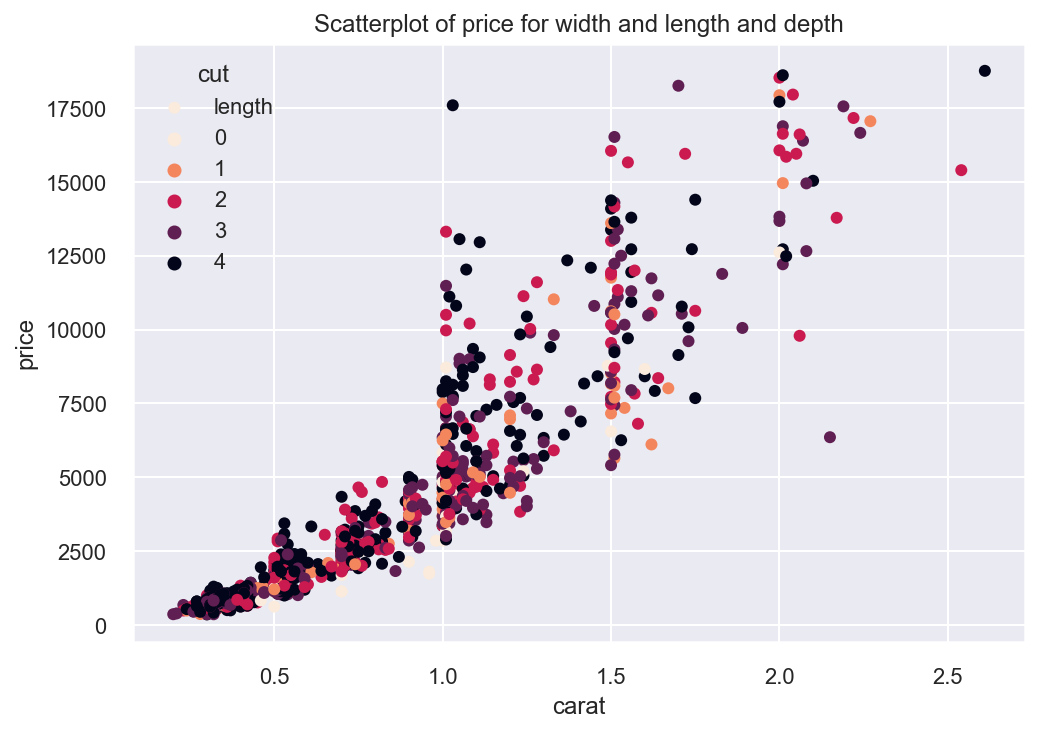

In [246]:
sns.set_style("darkgrid")

plt.title('Scatterplot of price for width and length and depth')
sns.scatterplot(data=df, x="carat", y="price", hue="cut", color="darkblue", label='length', palette="rocket_r", linewidth=0)
